In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../..')
import omama as O
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
odl = O.OutlierDetectorLite()

In [3]:
data_imgs = odl.load_data(DATASET='ASTAR')

In [4]:
gt = odl.load_ground_truth('ASTAR')

In [5]:
len(data_imgs)

1000

In [6]:
binary_bin_feats = O.Features.get_features(data=data_imgs, feature_type='hist', norm_type='minmax', bins=5)

In [7]:
bad_images = []
bad_indexes_found = []
paths = []
for i, binary in enumerate(binary_bin_feats):
    if binary[4] > 15000 or binary[1] < 2000:
        print(i, binary)
        bad_images.append(data_imgs[i])
        paths.append(data_imgs[i].filePath)
        bad_indexes_found.append(i)

32 [2653640  173118 1035469  411957  116532]
62 [2594696  213198 1143013  280116  159693]
79 [2174318  235000 1578722  335879   66797]
136 [3665087   57929  396231  240587   30882]
182 [2329052  136001 1488134  338470   99059]
199 [2721646  436149  779781  409358   43782]
208 [1987297  165181 1694664  458657   84917]
209 [2479085  119605 1382090  226412  183524]
228 [2165395   83238 1673840  358770  109473]
233 [2799447  176334  929329  315390  170216]
236 [2949238  271651  548856  477421  143550]
244 [3053733  106150  737755  262209  230869]
245 [3594160       0  793015    3540       1]
274 [3078442   10157   18564 1253029   30524]
276 [2270066   18586  233020 1711334  157710]
304 [2158388   23242 1649416  411964  147706]
311 [3112720  877263  212102  144922   43709]
336 [2774735  126787 1076940  268327  143927]
365 [3085948   88710  752140  252988  210930]
385 [2104000 1217638  662536  377496   29046]
386 [2634245  976655  383350  361737   34729]
388 [2925567  232398  825807  299679 

In [8]:
# 540, 559,957

In [9]:
np.where(np.array(gt)>0)

(array([ 32,  62,  79, 136, 182, 196, 199, 208, 209, 228, 233, 236, 244,
        245, 261, 274, 276, 279, 304, 311, 336, 365, 385, 386, 388, 447,
        484, 534, 544, 560, 575, 579, 585, 596, 605, 627, 700, 713, 718,
        741, 743, 754, 762, 764, 767, 776, 789, 792, 793, 807, 829, 846,
        847, 849, 853, 879, 882, 898, 936, 953, 971, 972, 975]),)

In [10]:
len(bad_images)

56

In [11]:
preds = O.DataHelper.build_gt(1000, bad_indexes_found)

In [12]:
f1 = sklearn.metrics.f1_score(gt, preds)

In [13]:
f1

0.8907563025210083

In [13]:
bad_images2 = []
for item in np.where(np.array(gt)>0):
    for index in item:
        bad_images2.append(data_imgs[index])

Loading config data from ini file
DataLoader type is:  <class 'omama.loaders.omama_loader.OmamaLoader'>


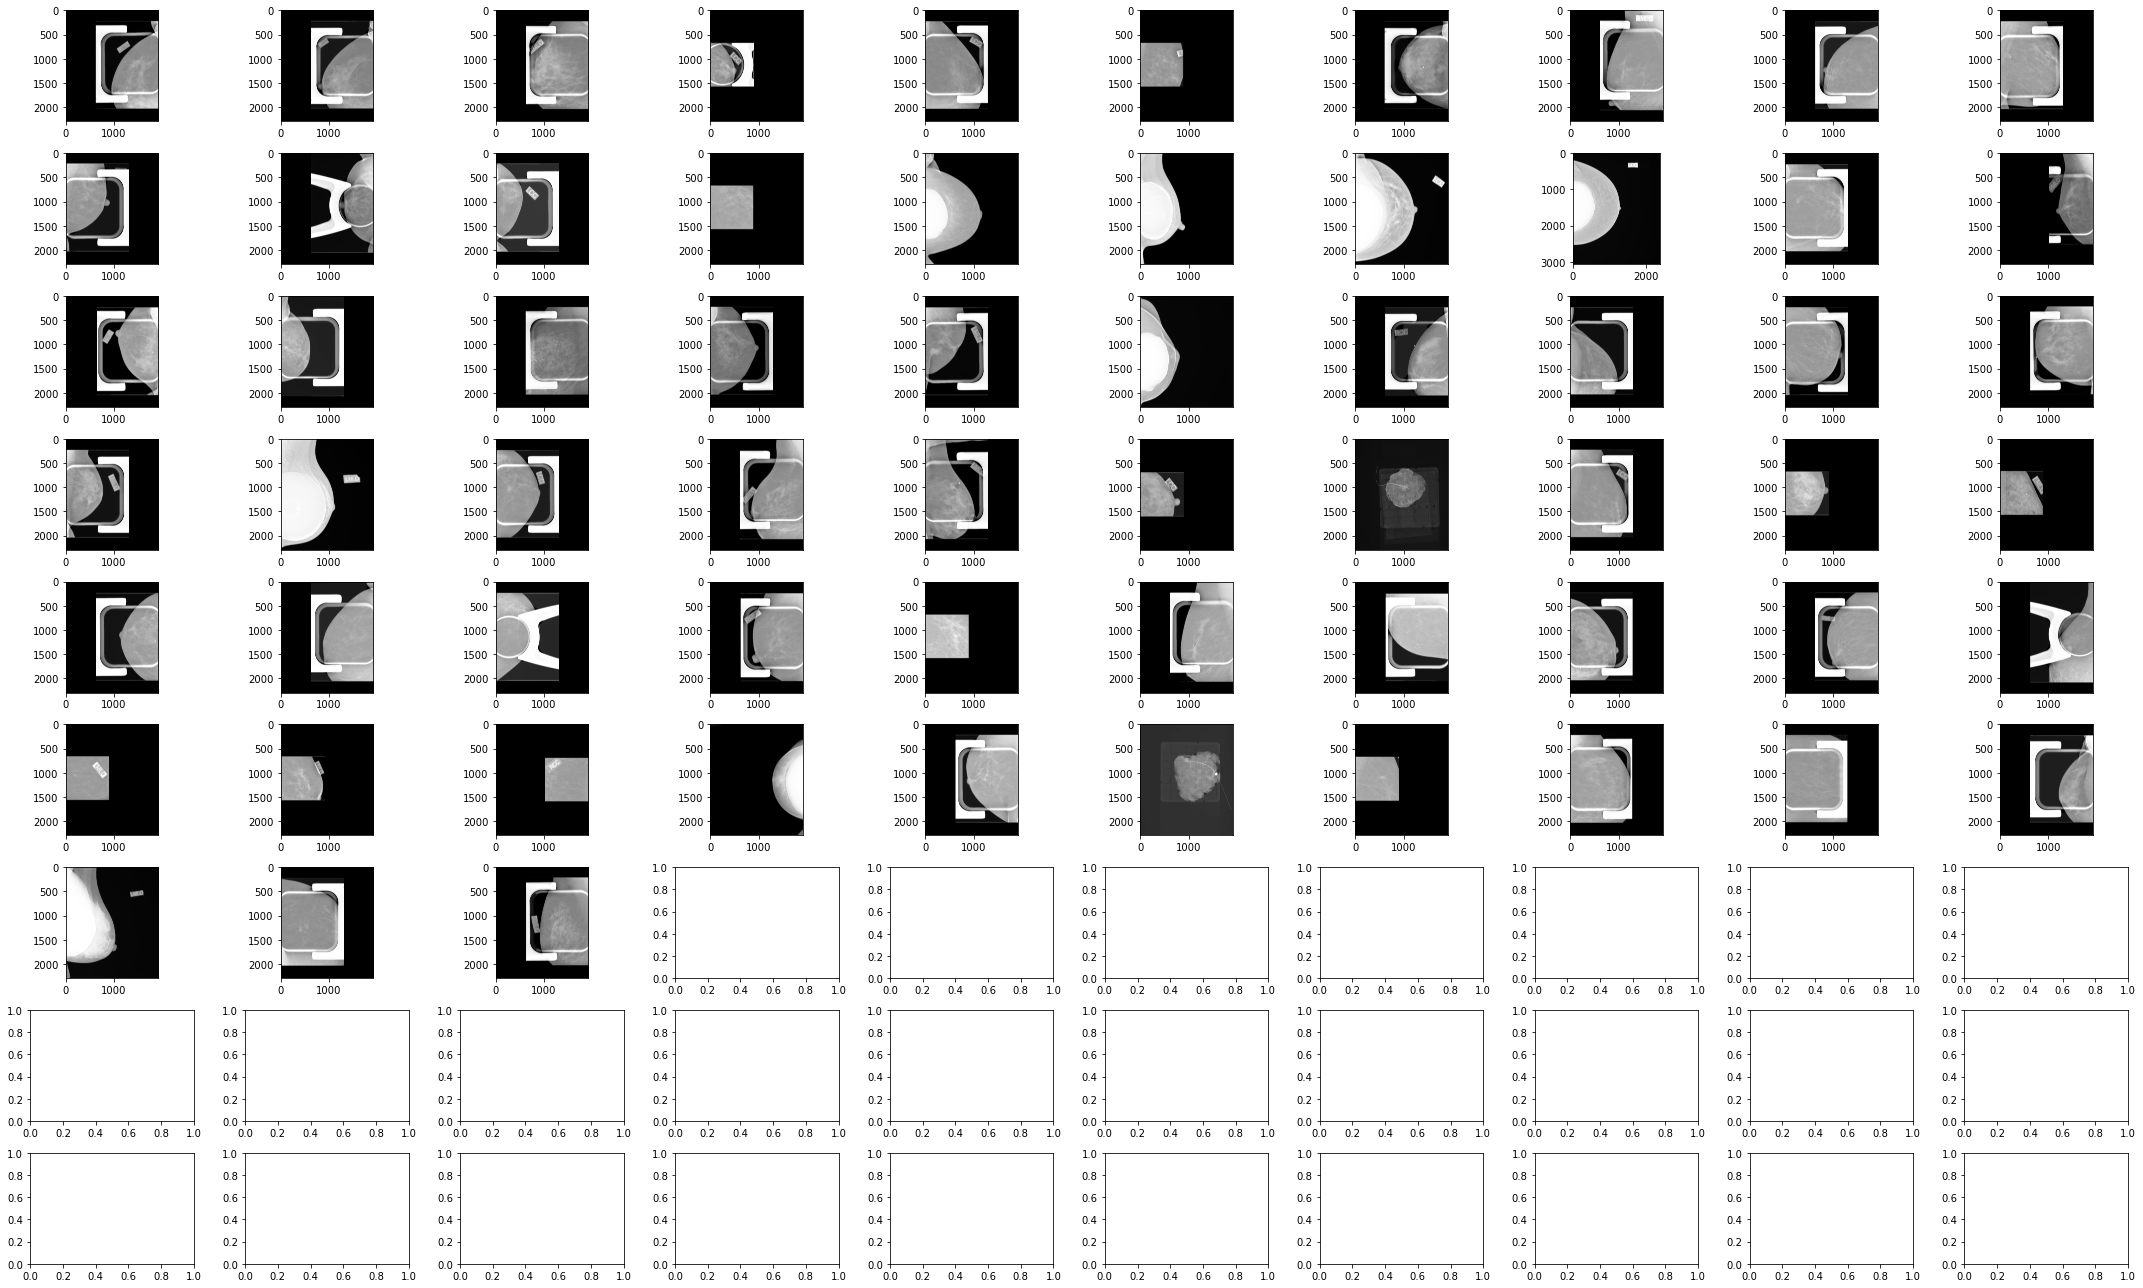

In [14]:
O.DataHelper.view_grid(bad_images2, ncols=10)